In [1]:
import numpy as np
import pockels_cal as pc
import h5py
import matplotlib.pyplot as plt

In [2]:
def printname(name): 
    print(name)

In [3]:
d1 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/02_22_2021_swept_pk'
d1_5 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_03_2021_swept_pk'
d2 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/frequency_comb/FEB172021noise'
d3 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/frequency_comb/FEB172021freqcomb'
d4 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_03_2021_comb_pk'
d5 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_03_2021_noise_pk'
f = h5py.File(d1 + '/data.hdf5', 'r') 
f2 = h5py.File(d2 + '/data.hdf5', 'r')
f3 = h5py.File(d3 + '/data.hdf5','r')
f1_5 = h5py.File(d1_5 + '/data.hdf5', 'r') 
f4 = h5py.File(d4 + '/data.hdf5', 'r')
f5 = h5py.File(d5 + '/data.hdf5', 'r')

In [4]:
f.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect_norm
calibrated/disp_spect_unnorm
calibrated/hva
calibrated/hva/ch1
calibrated/hva/ch3+pomona
calibrated/olg
calibrated/phase_resp_norm
calibrated/phase_resp_unnorm
cav_length
freq
laserV2Hz
laser_freq
pomona_vdivider
raw
raw/cal
raw/cal/deg
raw/cal/gain
raw/hva
raw/hva/ch1
raw/hva/ch1/db
raw/hva/ch1/deg
raw/hva/ch3+pomona
raw/hva/ch3+pomona/db
raw/hva/ch3+pomona/deg
raw/meas_freq_resp
raw/meas_freq_resp/db
raw/meas_freq_resp/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/vdirect
raw/vdirect/db
raw/vdirect/deg


In [5]:
f1_5.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect_norm
calibrated/disp_spect_unnorm
calibrated/hva
calibrated/hva/ch1
calibrated/hva/ch3+pomona
calibrated/olg
calibrated/phase_resp_norm
calibrated/phase_resp_unnorm
cav_length
freq
laserV2Hz
laser_freq
pomona_vdivider
raw
raw/cal
raw/cal/deg
raw/cal/gain
raw/hva
raw/hva/ch1
raw/hva/ch1/db
raw/hva/ch1/deg
raw/hva/ch3+pomona
raw/hva/ch3+pomona/db
raw/hva/ch3+pomona/deg
raw/meas_freq_resp
raw/meas_freq_resp/db
raw/meas_freq_resp/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/vdirect
raw/vdirect/db
raw/vdirect/deg


In [6]:
f2.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect
calibrated/hva
calibrated/olg
cav_length
freq
laserV2Hz
laser_freq
raw
raw/hva
raw/hva/db
raw/hva/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/v_spect


In [7]:
f3.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect
calibrated/hva
calibrated/olg
cav_length
freq
laserV2Hz
laser_freq
raw
raw/hva
raw/hva/db
raw/hva/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/v_spect


In [8]:
pc.transfer_function?

Signature: pc.transfer_function(amplitude, phase)
Docstring: <no docstring>
File:      ~/Documents/git/SU/algaas_electrooptic_effect/code/pockels_cal.py
Type:      function


In [12]:
CAL_gain = f['raw/cal/gain'][:]
CAL_deg = f['raw/cal/deg'][:]

In [13]:
final_phase = f['raw/hva/ch3+pomona/deg'][:] + f['raw/meas_freq_resp/deg'][:]-f['raw/cal/deg'][:]
loop_cal_phase = f['raw/cal/deg'][:] + f['raw/hva/ch3+pomona/deg'][:]

In [14]:
phases = (final_phase + 180) % (2 * 180) - 180

In [15]:
unwrp_ph = np.unwrap(phases,discont=180)

Text(0.5, 0, 'frequency [Hz]')

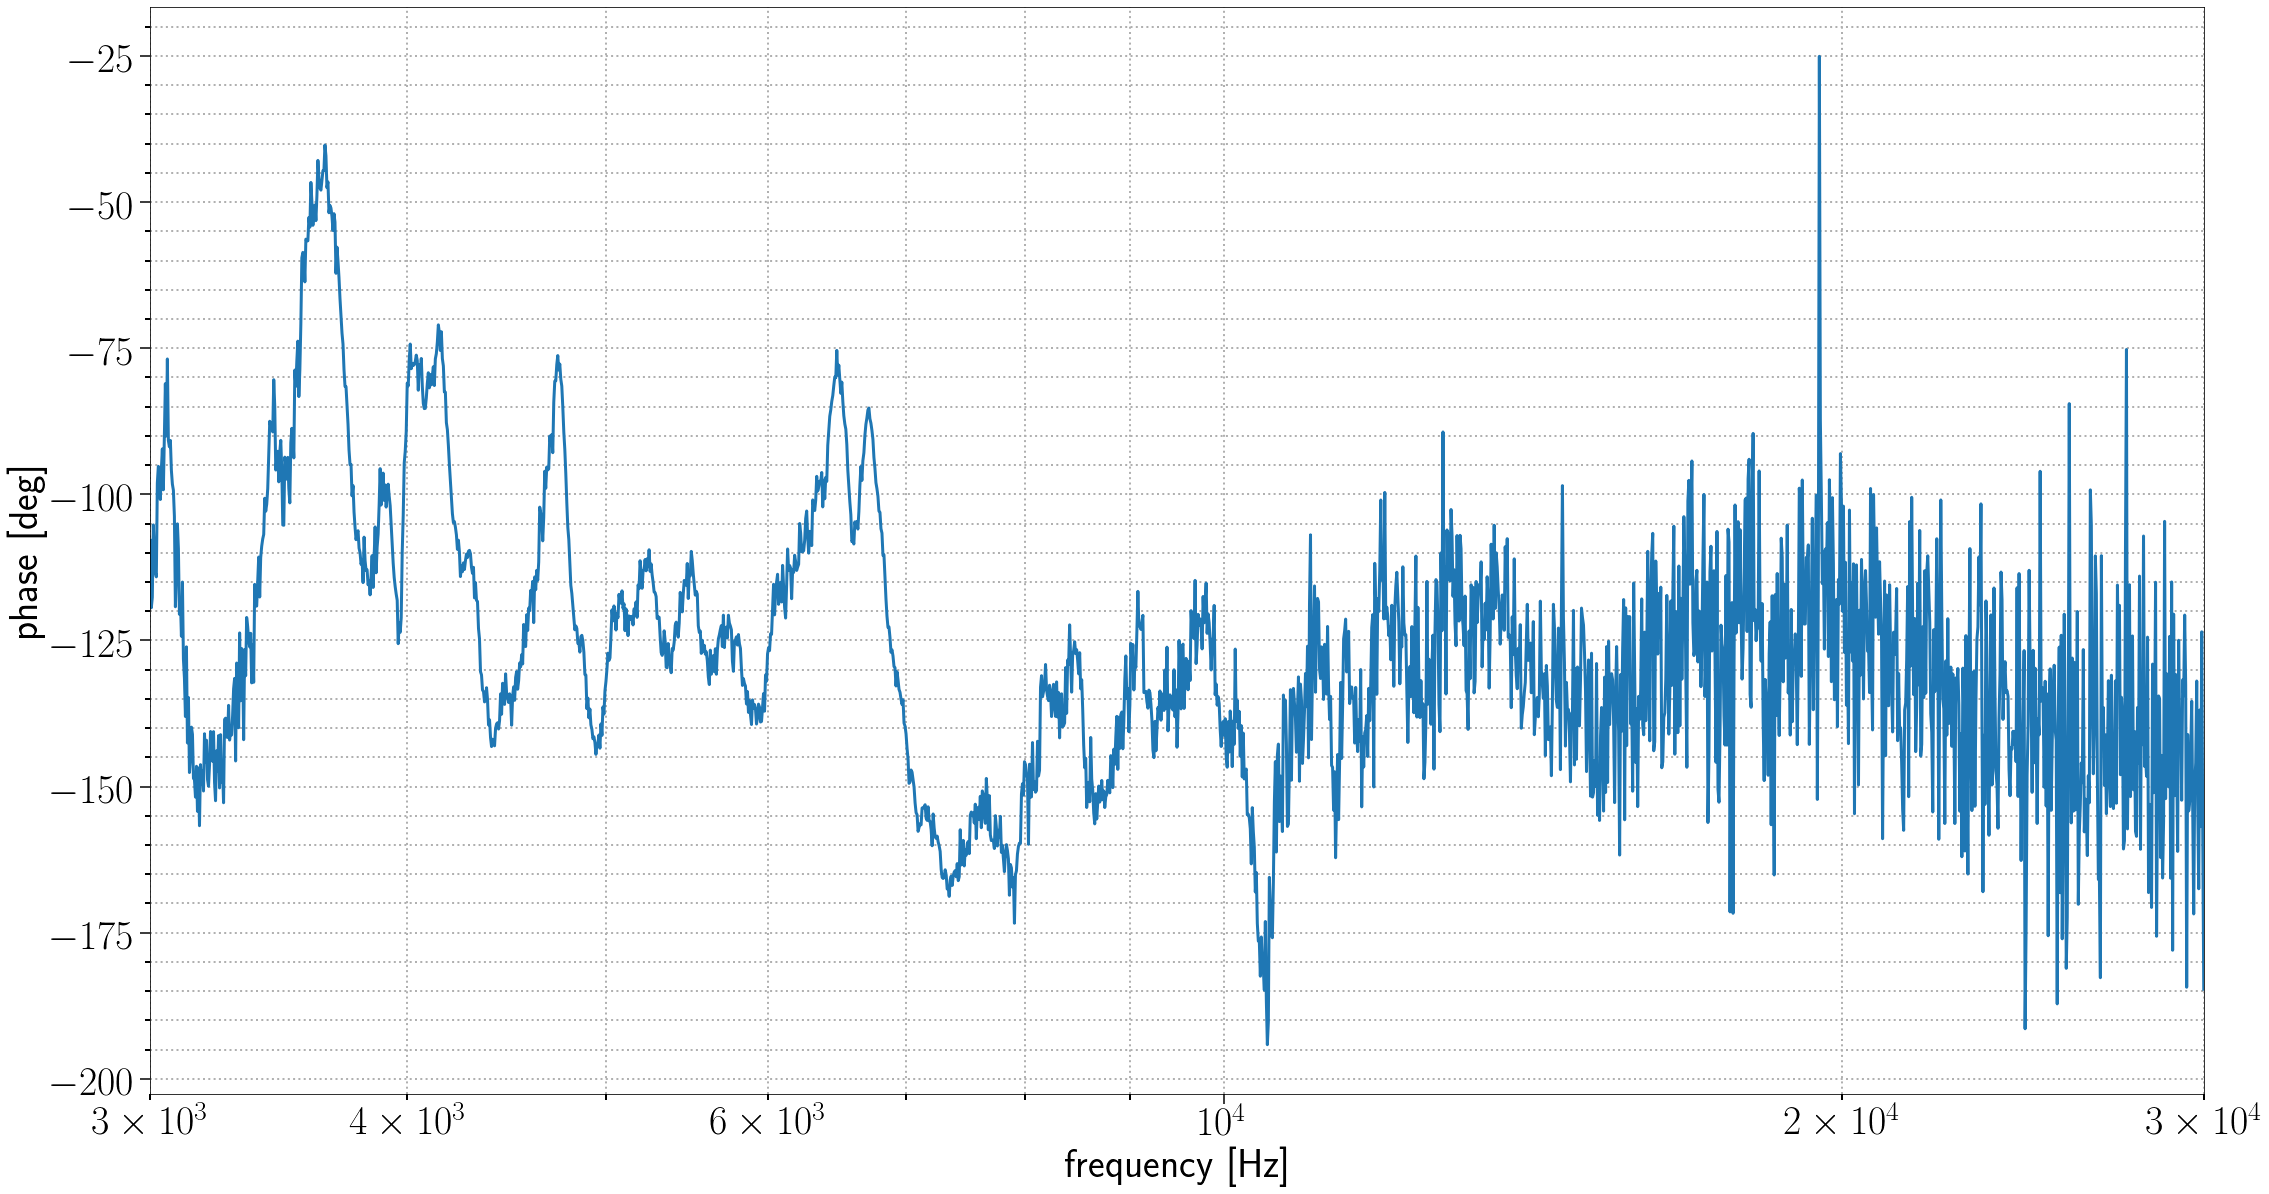

In [16]:
plt.semilogx(f['freq'], final_phase)
plt.xlim([f['freq'][0],f['freq'][-1]])
plt.ylabel('phase [deg]')
plt.xlabel('frequency [Hz]')

In [9]:
model_freq = 10000
marty_estimate = 3.8e-16 #mpk/[V*m]
Efield_strength_estimate = 6350 #[V*m]

In [12]:
new_noise_floor = np.interp(f['freq'][:],f2['freq'][:],f2['calibrated/disp_spect'][:])
new_noise_floor2 = np.interp(f1_5['freq'][:],f5['freq'][:], f5['calibrated/disp_spect'][:])
new_noise_floor3 = np.interp(f4['freq'][:],f5['freq'][:], f5['calibrated/disp_spect'][:])

/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


Text(0.5, 0, 'frequency [Hz]')

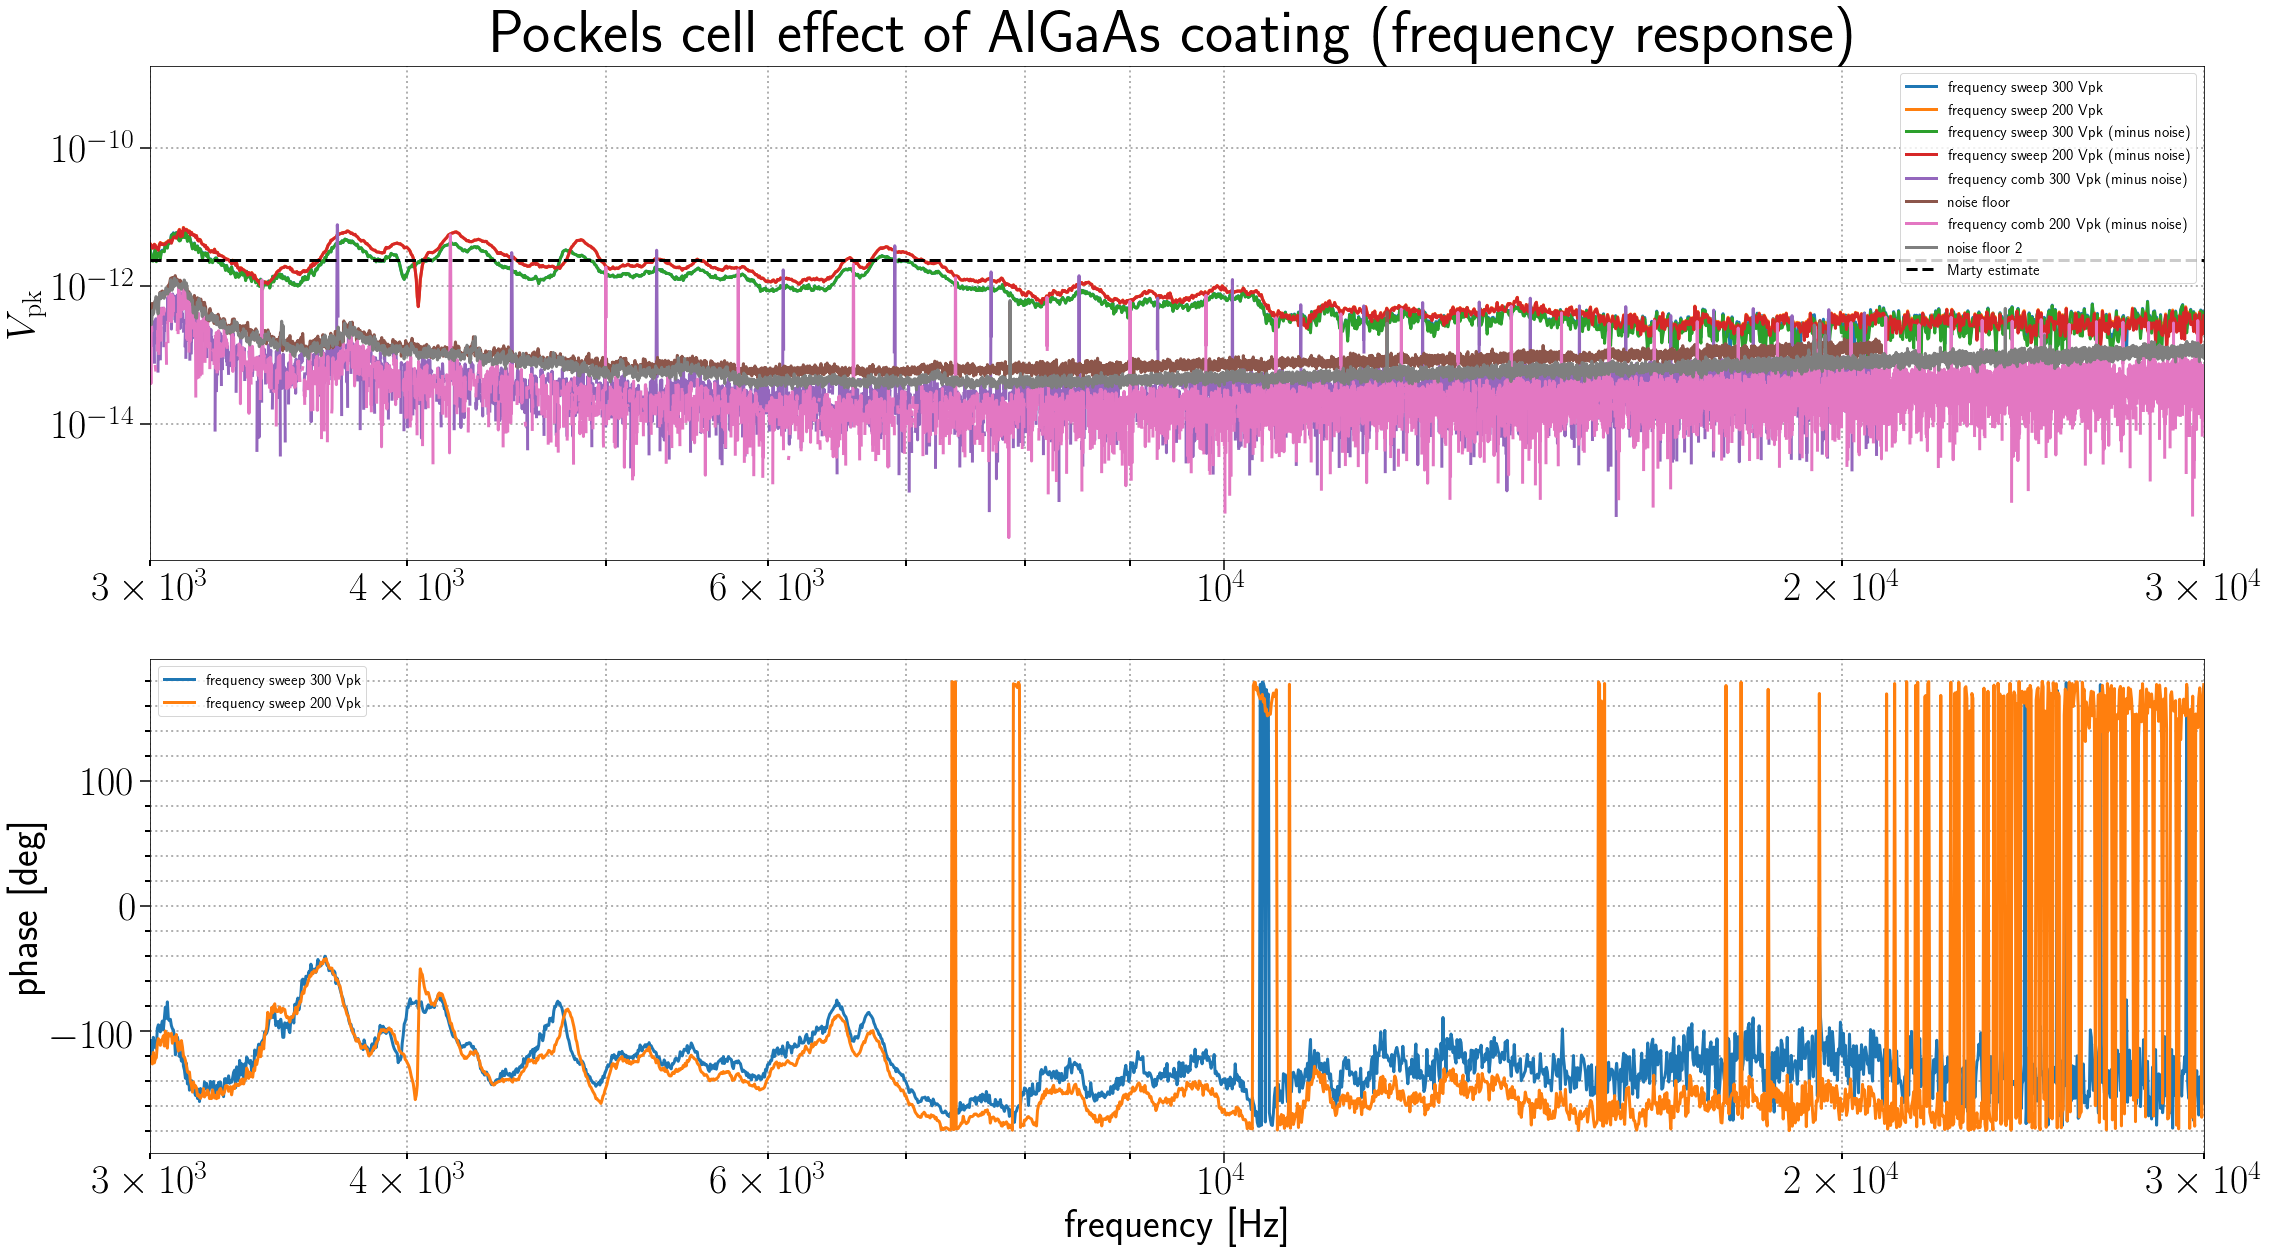

In [17]:
plt.subplot(211)
plt.loglog(f['freq'], f['calibrated/disp_spect_unnorm'][:],label='frequency sweep 300 Vpk')
plt.loglog(f1_5['freq'], f1_5['calibrated/disp_spect_unnorm'][:], label='frequency sweep 200 Vpk')
#plt.loglog(f['freq'], f['calibrated/disp_spect_unnorm'][:], label='frequency sweep 300 Vpk (minus noise)')
#plt.loglog(f1_5['freq'], np.sqrt(f1_5['calibrated/disp_spect_unnorm'][:]**2-new_noise_floor2**2), label='frequency sweep 200 Vpk (minus noise)')
plt.loglog(f3['freq'],np.sqrt(f3['calibrated/disp_spect'][:]**2-f2['calibrated/disp_spect'][:]**2), label= 'frequency comb 300 Vpk (minus noise)')
plt.loglog(f2['freq'], f2['calibrated/disp_spect'],label = 'noise floor')
plt.loglog(f4['freq'], np.sqrt(f4['calibrated/disp_spect'][:]**2-new_noise_floor3**2), label = 'frequency comb 200 Vpk (minus noise)')
plt.loglog(f5['freq'], f5['calibrated/disp_spect'], label = 'noise floor 2')
plt.axhline(y=marty_estimate*Efield_strength_estimate,linestyle='--',color='k', label='Marty estimate')
plt.legend(prop={'size':15})
plt.xlim([f['freq'][0],f['freq'][-1]])
plt.ylabel('$$V_\mathrm{pk}$$')
plt.title('Pockels cell effect of AlGaAs coating (frequency response)')
plt.subplot(212)
plt.semilogx(f['freq'], f['calibrated/phase_resp_unnorm'], label='frequency sweep 300 Vpk')
plt.semilogx(f1_5['freq'], f1_5['calibrated/phase_resp_unnorm'], label='frequency sweep 200 Vpk')
plt.xlim([f['freq'][0],f['freq'][-1]])
plt.legend(prop={'size':15})
plt.ylabel('phase [deg]')
plt.xlabel('frequency [Hz]')
#plt.savefig('algaas_pockels_swept_frequency_results' + '.png', dpi=300,bbox_inches='tight')

Text(0.5, 0, 'frequency [Hz]')

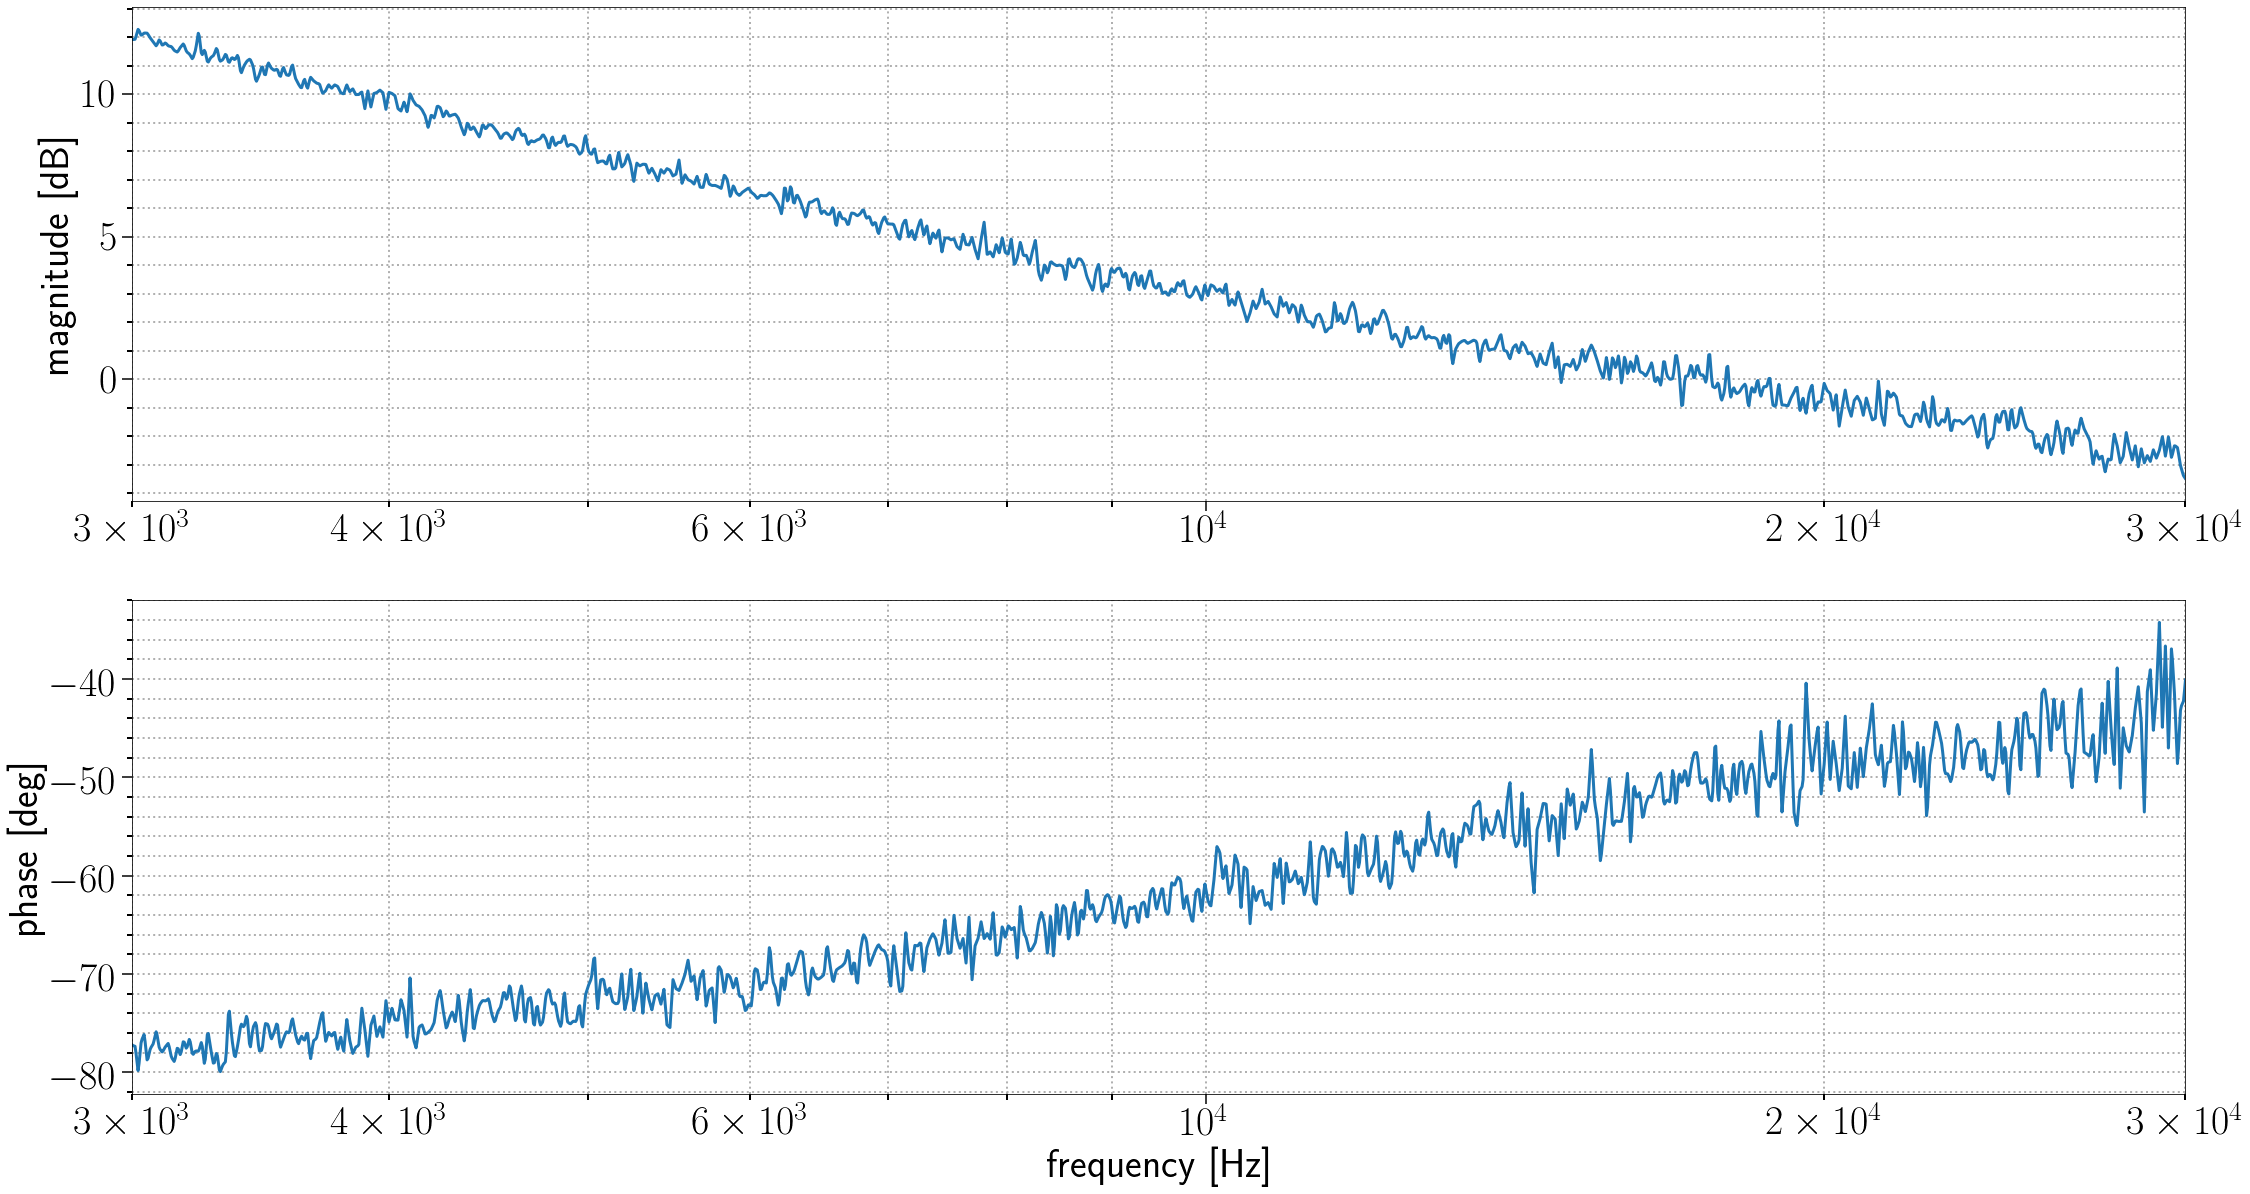

In [62]:
plt.subplot(211)
plt.semilogx(f['freq'], f['raw/hva/ch3+pomona/db'])
plt.xlim([f['freq'][0],f['freq'][-1]])
plt.ylabel('magnitude [dB]')

plt.subplot(212)
plt.semilogx(f['freq'], f['raw/hva/ch3+pomona/deg'])
plt.xlim([f['freq'][0],f['freq'][-1]])
plt.ylabel('phase [deg]')
plt.xlabel('frequency [Hz]')

(100.0, 20900.0)

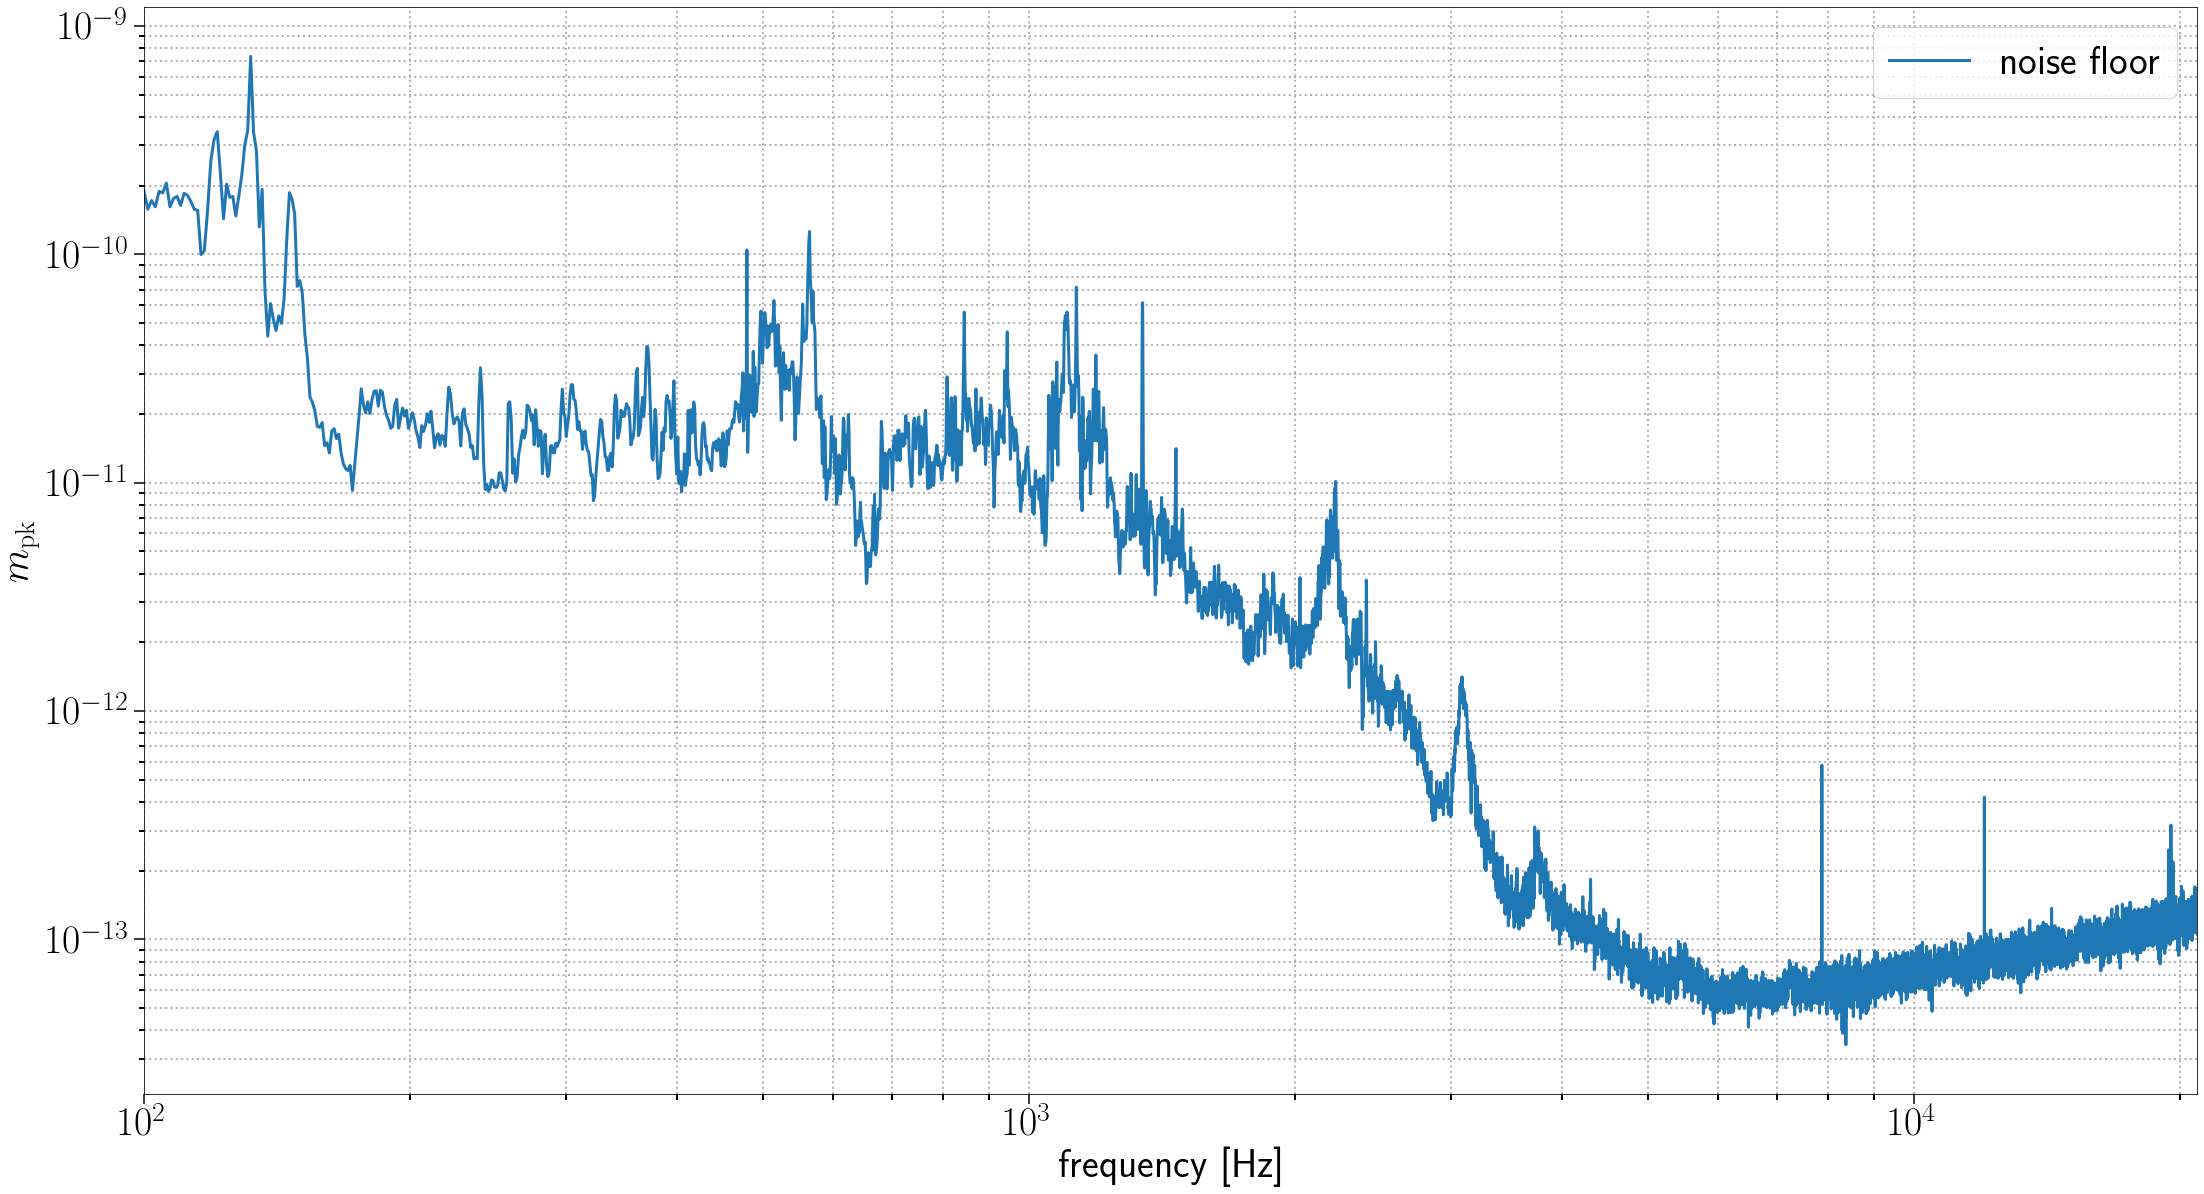

In [51]:
plt.loglog(f2['freq'], f2['calibrated/disp_spect'],label = 'noise floor')
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('$$m_\mathrm{pk}$$')
plt.xlim([f2['freq'][0], f2['freq'][-1]])

(100.0, 20900.0)

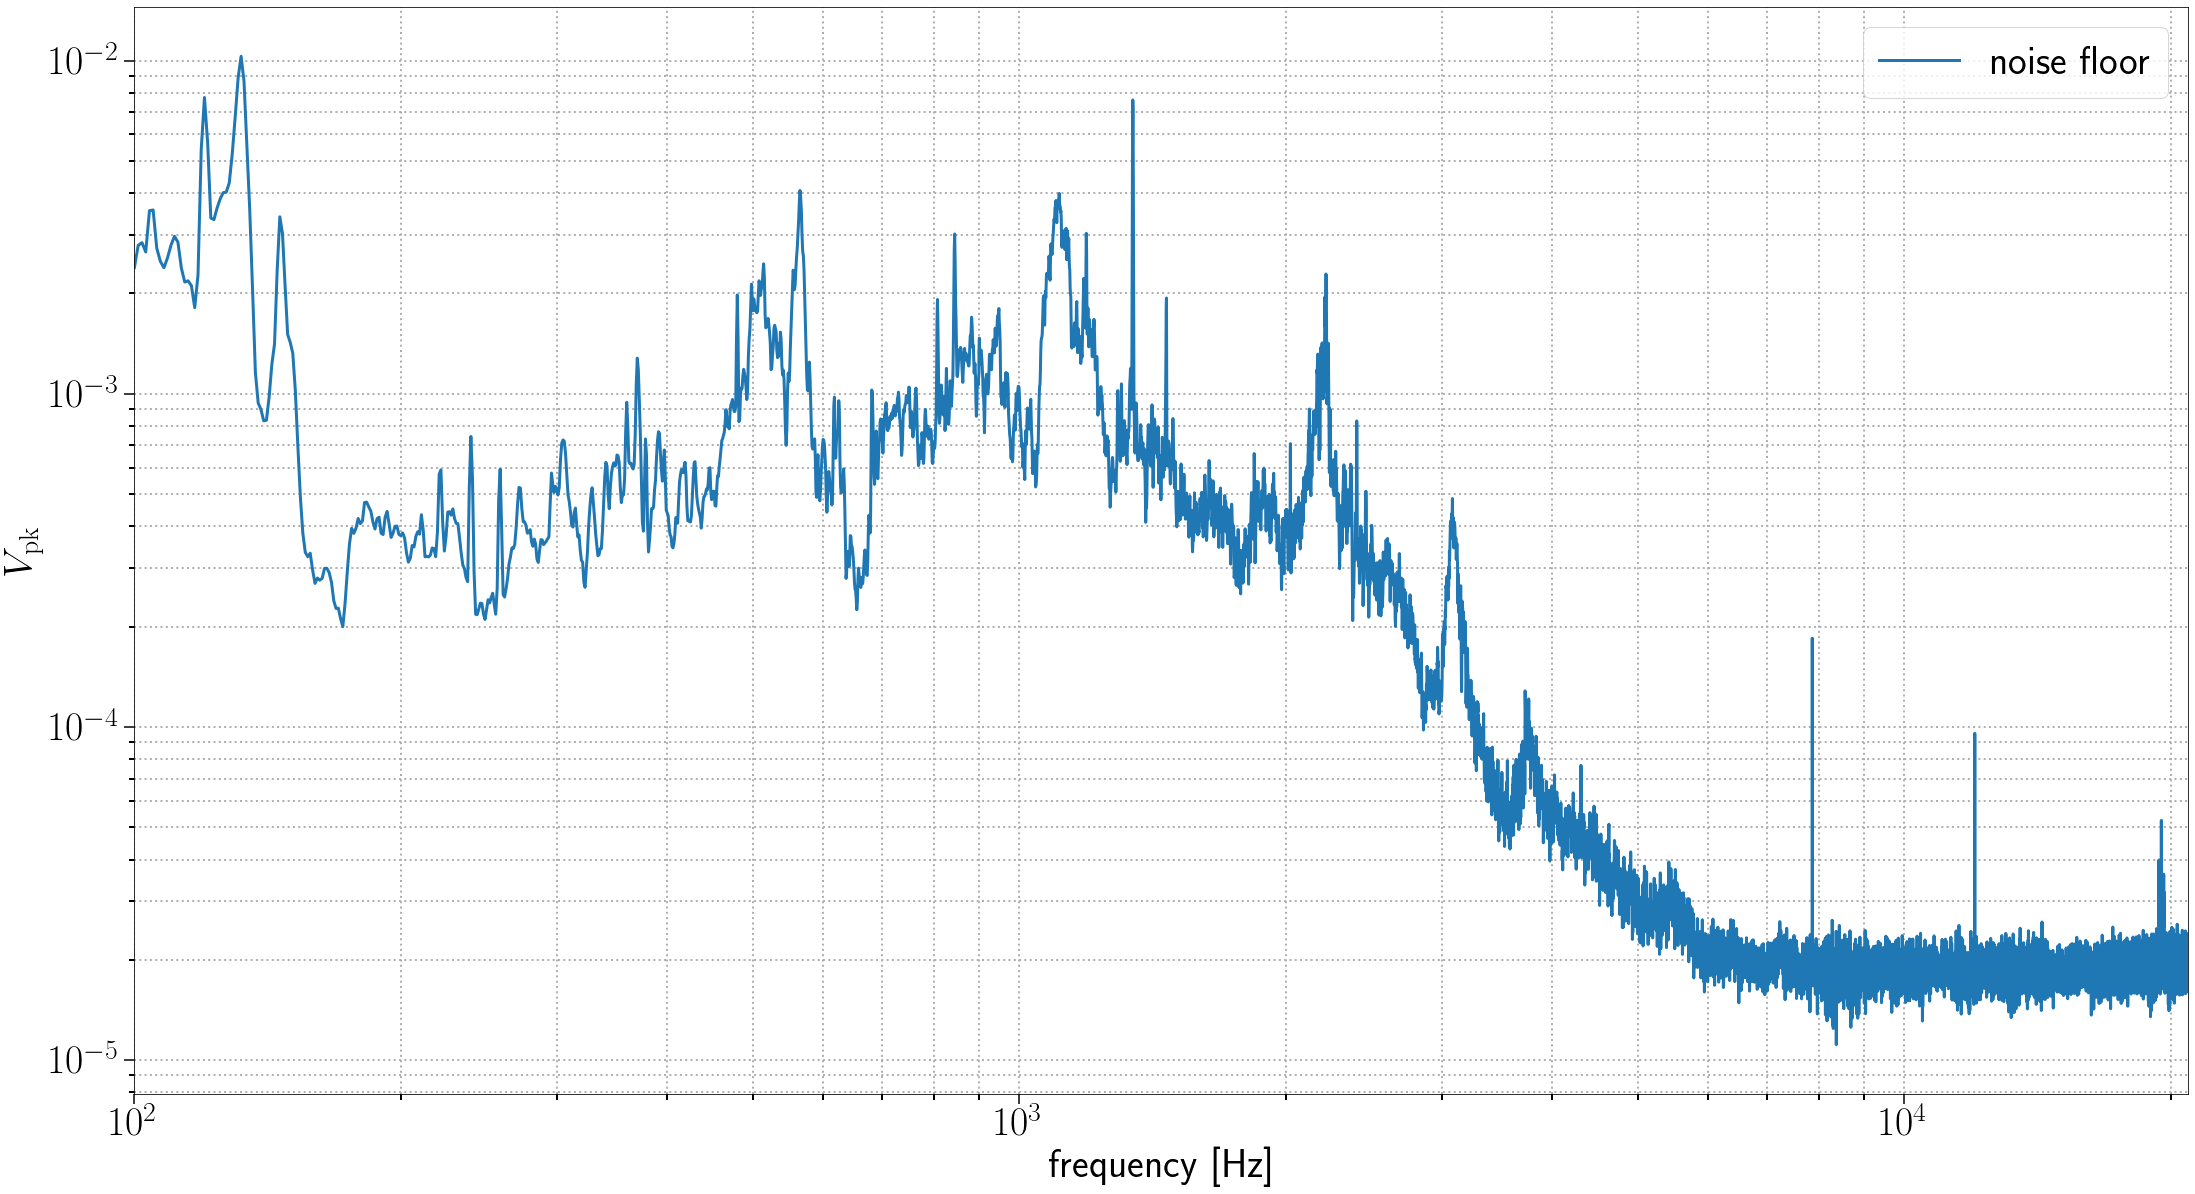

In [52]:
plt.loglog(f2['freq'], f2['raw/v_spect'],label = 'noise floor')
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('$$V_\mathrm{pk}$$')
plt.xlim([f2['freq'][0], f2['freq'][-1]])

Text(0, 0.5, 'phase [deg]')

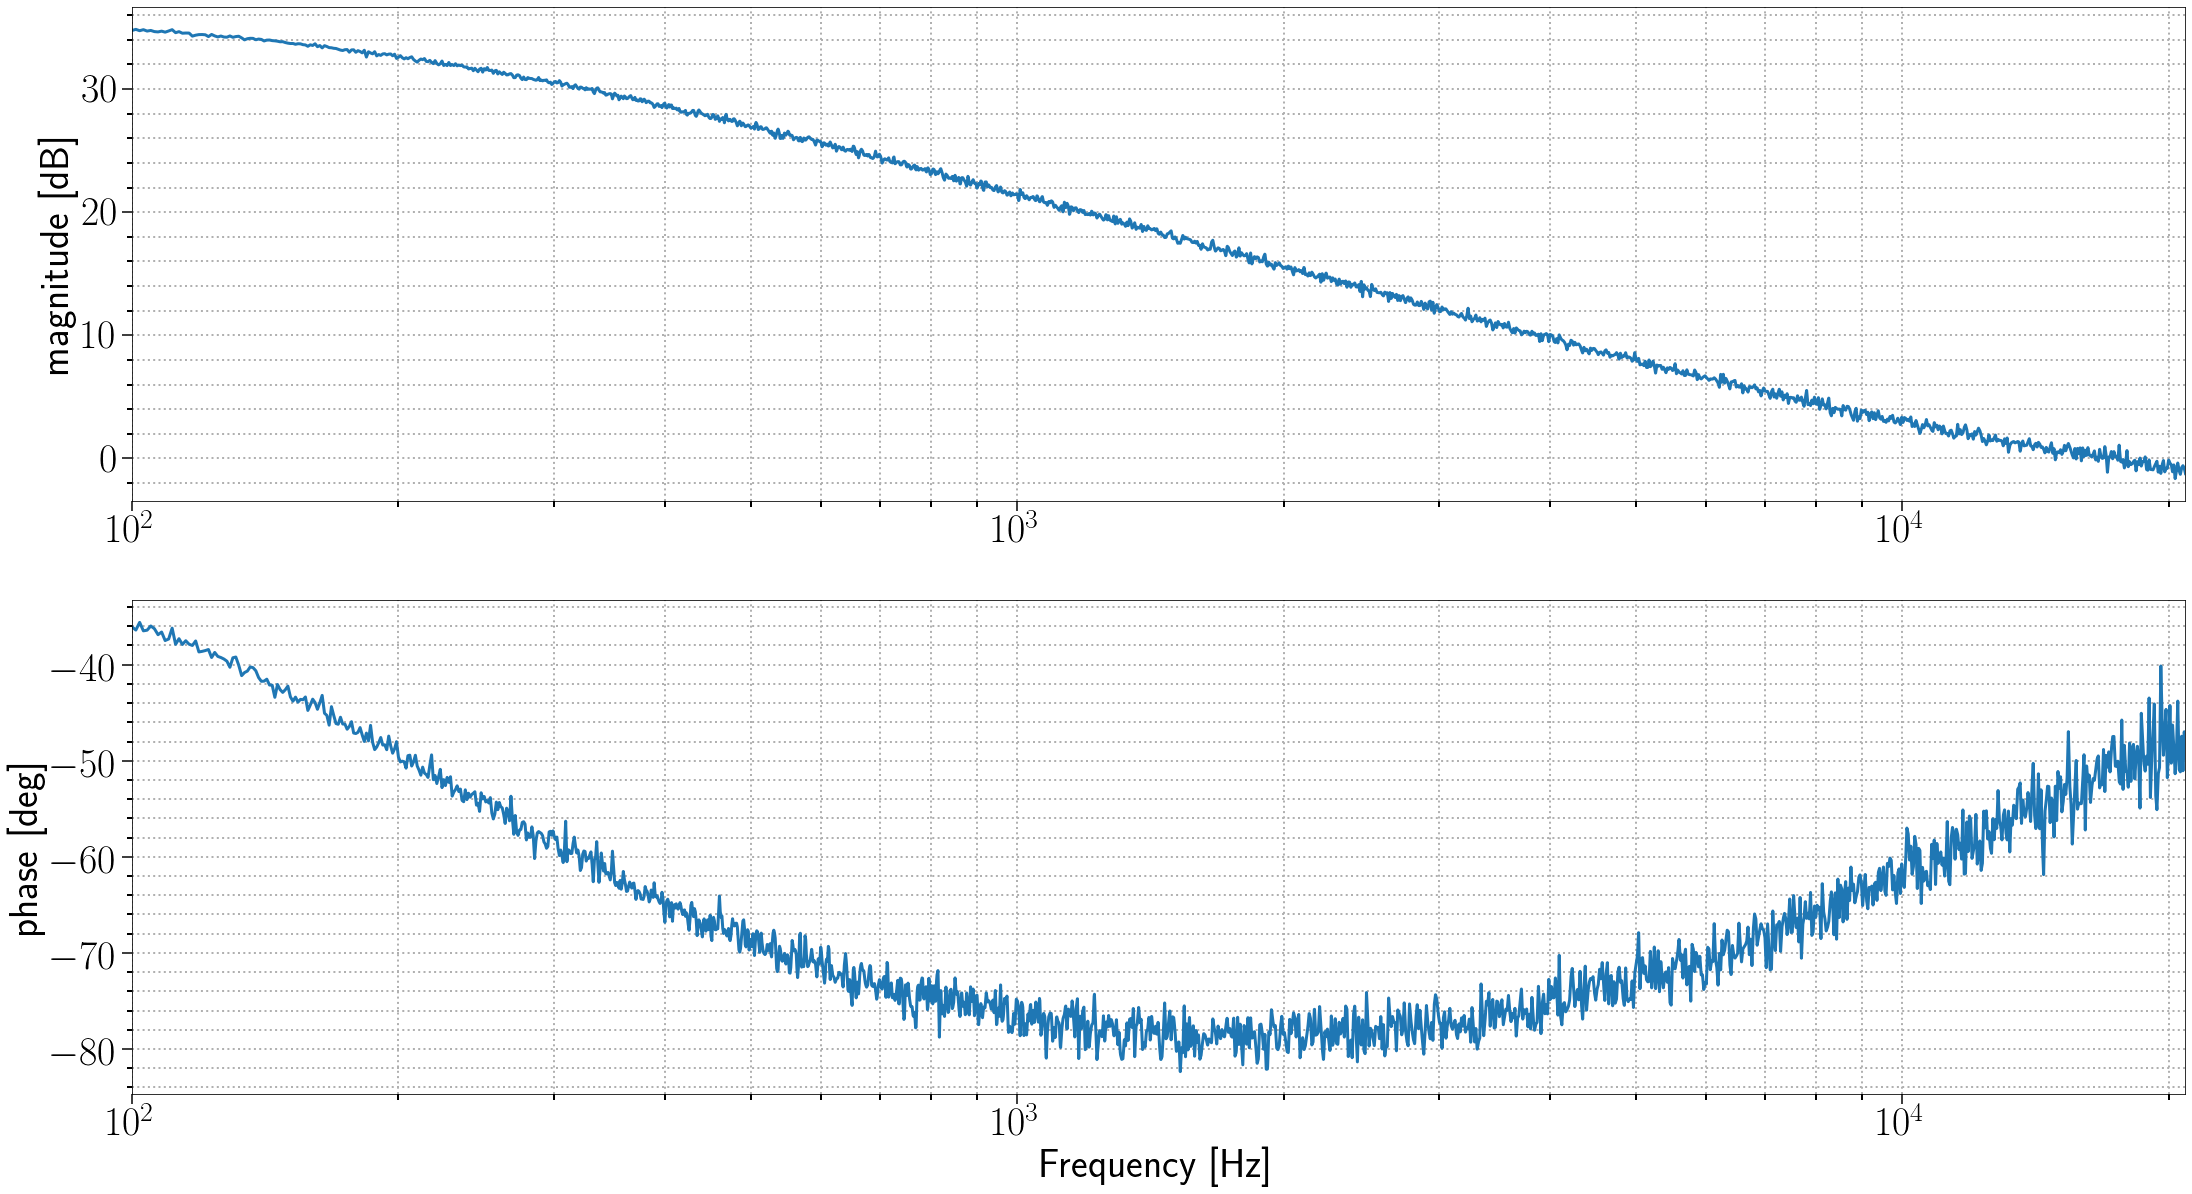

In [56]:
ff = f2['freq']
db = f2['raw/hva/db']
deg = f2['raw/hva/deg']
bode_fig = plt.figure()
plt.subplot(211)
plt.semilogx(ff,db)
plt.xlim(ff[0], ff[-1])
plt.ylabel('magnitude [dB]')
plt.subplot(212)
plt.semilogx(ff,deg)
plt.xlim(ff[0], ff[-1])

plt.xlabel('Frequency [Hz]')
plt.ylabel('phase [deg]')

In [23]:
f.close()
f2.close()
f3.close()
f1_5.close()
f4.close()
f5.close()